In [1]:
# (1) 利用するデータを持つライブラリのインストール（初回のみ）
# !pip install rdata

In [2]:
# (2) ライブラリとデータの読み込み
import pandas as pd
import rdata
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline


parsed = rdata.parser.parse_file('../data/vouchers.rda')
converted = rdata.conversion.convert(parsed)
vouchers = converted['vouchers']

/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/rdata/conversion/_conversion.py:495: UserWarning: Missing constructor for R class "tbl_df". The constructor for class "tbl" will be used instead.
  stacklevel=1)
/Users/shotaroishihara/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/rdata/conversion/_conversion.py:495: UserWarning: Missing constructor for R class "tbl". The constructor for class "data.frame" will be used instead.
  stacklevel=1)


In [3]:
# (3) Angrist(2002)のTable 3. bogota 1995の再現
## 回帰式の準備
### 回帰式で使う文字列の準備
formula_x_base = 'VOUCH0'
formula_x_covariate = [
    'SVY', 'HSVISIT', 'AGE', 'STRATA1', 'STRATA2', 'STRATA3', 'STRATA4', 'STRATA5', 'STRATA6', 'STRATAMS',
    'D1993', 'D1995', 'D1997', 'DMONTH1', 'DMONTH2', 'DMONTH3', 'DMONTH4', 'DMONTH5', 'DMONTH6',
    'DMONTH7', 'DMONTH8', 'DMONTH9', 'DMONTH10', 'DMONTH11', 'DMONTH12', 'SEX2'
]
formula_y = [
    "TOTSCYRS","INSCHL","PRSCH_C","USNGSCH","PRSCHA_1","FINISH6","FINISH7","FINISH8","REPT6",
    "REPT","NREPT","MARRIED","HASCHILD","HOURSUM","WORKING3"
]

In [4]:
vouchers.head()

,ID,BOG95SMP,BOG97SMP,JAM93SMP,SEX,AGE,AGE2,HSVISIT,SCYFNSH,INSCHL,...,REPT,NREPT,FINISH6,FINISH7,FINISH8,SEX_MISS,USNGSCH,HOURSUM,TAB3SMPL,WORKING3
0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,0.0,0.0,1.0,NaN,12.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0.0,0.0,0.0,0.0,NaN,13.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1.0,0.0,0.0,0.0,14.0,12.0,0.0,8.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.0,1.0,0.0,0.0,1.0,14.0,12.0,0.0,8.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [5]:
regression_data = vouchers.query('TAB3SMPL == 1and BOG95SMP == 1').reset_index(drop=True)

In [6]:
base_reg = []
covariate_reg = []
for fy in formula_y:
    base_reg.append(LinearRegression().fit(regression_data[[formula_x_base]], regression_data[fy].fillna(0)).coef_[0])
    covariate_reg.append(LinearRegression().fit(regression_data[[formula_x_base] + formula_x_covariate], regression_data[fy].fillna(0)).coef_[0])

([<matplotlib.axis.XTick at 0x1c287dd668>,
 <a list of 15 Text xticklabel objects>)

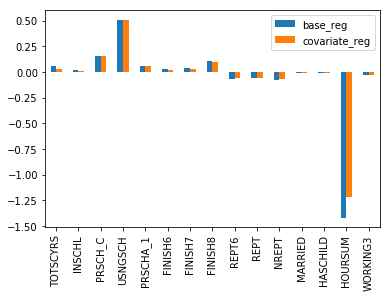

In [7]:
pd.DataFrame({
    'formula_y': formula_y,
    'base_reg': base_reg,
    'covariate_reg': covariate_reg
}).plot.bar()
plt.xticks([i for i in range(len(formula_y))], formula_y)